The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
41 Unique LithCodes that are not UNKN or numeric
['GRVL' 'CLAY' 'CRSE' 'SHLE' 'BSLT' 'ROCK' 'SAND' 'SOIL' 'GRNT' 'SASH'
 'CGLM' 'SDSN' 'TPSL' 'BLBN' 'COAL' 'SILT' 'LMSN' 'ALVM' 'QRTZ' 'SDCY'
 'LOAM' 'BLDR' 'SLTE' 'SLCY' 'BNST' 'VLCC' 'SLSN' 'BRBN' 'GRBN' 'MDSN'
 'WB' 'TUFF' 'BDRK' 'SNDY' 'SDMN' 'CVTY' 'CLBD' 'FILL' 'DLMT' 'WODY'
 'FINE']
Attempting to fill in unknown MajorLithCode based on provided descriptions
Pink volcanic clay  -> CLAY (142)
Sandy clay  -> CLAY (142)
Black soil  -> TPSL (37)
Soft basalt  -> BSLT (34)
Brown clay  -> CLAY (142)
Sand and gravel  -> SAND (49)
Silty clay brown with white flakes  -> CLAY (3)
Softer brown & grey clay  -> CLAY (142)
Brown clay with pebbles  -> CLAY (142)
Grey mudstones  -> UNKN (0)
Washed river  gravel  -> CLAY (18)
Dry gravel  -> GRVL (30)
Soft sandstone & gravel  -> SDSN (48)
Water supply  -> SAND (17)
Sandstone  -> SDSN (52)
W.b. basalt  -> BSLT (31)


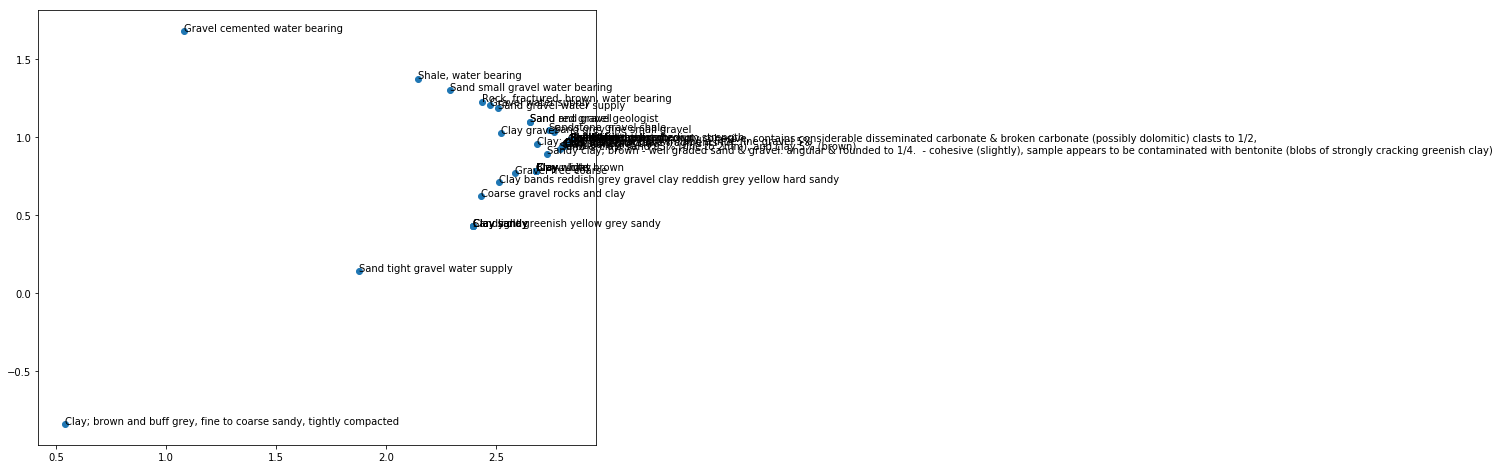

0.0
0.13163076121417486
0.0
1.0000000000000009


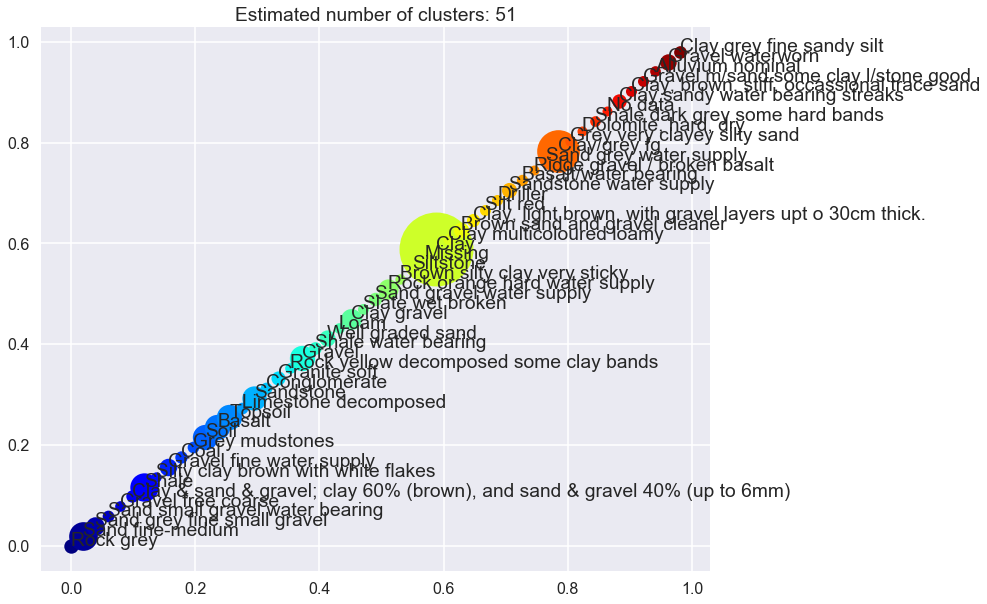

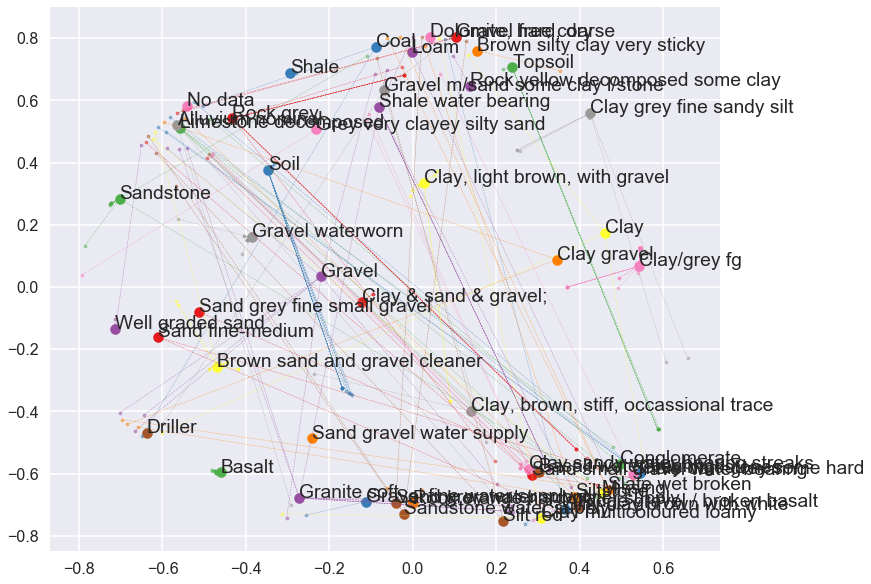

In [7]:
%run "Lith Affinity Prop.ipynb"

# The above runs the notebook setup as well

# Let's try HDBScan

Useful links
* http://nbviewer.jupyter.org/github/scikit-learn-contrib/hdbscan/blob/master/notebooks/How%20HDBSCAN%20Works.ipynb
* http://hdbscan.readthedocs.io/en/latest/basic_hdbscan.html

In [20]:
sim_matrix

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 1., 0., 1.],
       [0., 1., 1., ..., 1., 0., 1.],
       ...,
       [0., 1., 1., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 1., 0., 1.]])

In [22]:
import hdbscan
from sklearn.metrics.pairwise import cosine_distances

cos_dist = cosine_distances(1 - token_sim)

clusterer = hdbscan.HDBSCAN(min_cluster_size=2, gen_min_span_tree=True, metric='precomputed')
clusterer.fit(cos_dist)

# clusterer = hdbscan.RobustSingleLinkage(cut=0.125, k=7)
# cluster_labels = clusterer.fit_predict(token_similarity)
# hierarchy = clusterer.cluster_hierarchy_
# alt_labels = hierarchy.get_clusters(0.100, 5)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
    approx_min_span_tree=True, cluster_selection_method='eom',
    core_dist_n_jobs=4, gen_min_span_tree=True, leaf_size=40,
    match_reference_implementation=False, memory=Memory(cachedir=None),
    metric='precomputed', min_cluster_size=2, min_samples=None, p=None,
    prediction_data=False)

Text(0.5,1,'There are 74 clusters')

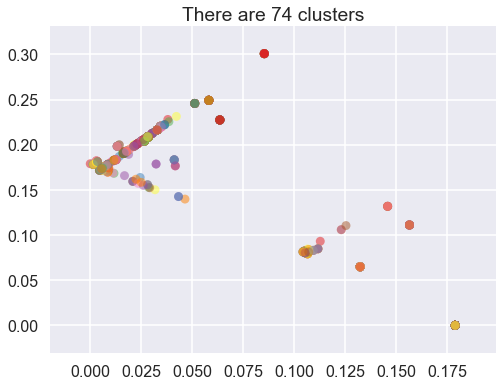

In [25]:
import seaborn as sns
sns.set_context('poster')
sns.set_style('darkgrid')
sns.set_color_codes()

plt.figure(figsize=(8,6))

plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}
palette = sns.color_palette()

cm = plt.get_cmap('Set1')
colors = [cm(1.0*i/n_clusters_) for i in range(n_clusters_)]

# cluster_colors = [sns.desaturate(colors[col], sat) 
#                   if col >= 0.0 else (0.5, 0.5, 0.5) for col, sat in
#                   zip(clusterer.labels_, clusterer.probabilities_)]

# plt.scatter(cos_dist.T[0], cos_dist.T[1], c=cluster_colors, **plot_kwds)
plt.scatter(cos_dist.T[0], cos_dist.T[1], c=colors, **plot_kwds)
plt.title("There are {} clusters".format(clusterer.labels_.max()))

In [17]:
?hdbscan.HDBSCAN